In [1]:
completeP = 'energydata_complete.csv'
testP = 'testing.csv'
trainingP = 'training.csv'

In [22]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pylab as plt
from scipy import stats
import matplotlib.dates as mdates
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn import preprocessing 
from prettypandas import PrettyPandas as pp
import matplotlib.ticker as ticker
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set_context(context="notebook",font_scale=1)

In [3]:
# Load the data and show the info and contents:
df = pd.read_csv(completeP) 
#df.set_index('date', inplace=True)
print(df.shape)
pp(df.head(10))

(19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.5967,19.2,44.79,19.79,44.73,19,45.5667,17.1667,55.2,7.02667,84.2567,17.2,41.6267,18.2,48.9,17.0333,45.53,6.6,733.5,92,7,63,5.3,13.2754,13.2754
1,2016-01-11 17:10:00,60,30,19.89,46.6933,19.2,44.7225,19.79,44.79,19,45.9925,17.1667,55.2,6.83333,84.0633,17.2,41.56,18.2,48.8633,17.0667,45.56,6.48333,733.6,92,6.66667,59.1667,5.2,18.6062,18.6062
2,2016-01-11 17:20:00,50,30,19.89,46.3,19.2,44.6267,19.79,44.9333,18.9267,45.89,17.1667,55.09,6.56,83.1567,17.2,41.4333,18.2,48.73,17,45.5,6.36667,733.7,92,6.33333,55.3333,5.1,28.6427,28.6427
3,2016-01-11 17:30:00,50,40,19.89,46.0667,19.2,44.59,19.79,45,18.89,45.7233,17.1667,55.09,6.43333,83.4233,17.1333,41.29,18.1,48.59,17,45.4,6.25,733.8,92,6,51.5,5,45.4104,45.4104
4,2016-01-11 17:40:00,60,40,19.89,46.3333,19.2,44.53,19.79,45,18.89,45.53,17.2,55.09,6.36667,84.8933,17.2,41.23,18.1,48.59,17,45.4,6.13333,733.9,92,5.66667,47.6667,4.9,10.0841,10.0841
5,2016-01-11 17:50:00,50,40,19.89,46.0267,19.2,44.5,19.79,44.9333,18.89,45.73,17.1333,55.03,6.3,85.7667,17.1333,41.26,18.1,48.59,17,45.29,6.01667,734,92,5.33333,43.8333,4.8,44.9195,44.9195
6,2016-01-11 18:00:00,60,50,19.89,45.7667,19.2,44.5,19.79,44.9,18.89,45.79,17.1,54.9667,6.26333,86.09,17.1333,41.2,18.1,48.59,17,45.29,5.9,734.1,92,5,40,4.7,47.2338,47.2338
7,2016-01-11 18:10:00,60,50,19.8567,45.56,19.2,44.5,19.73,44.9,18.89,45.8633,17.1,54.9,6.19,86.4233,17.1,41.2,18.1,48.59,17,45.29,5.91667,734.167,91.8333,5.16667,40,4.68333,33.0399,33.0399
8,2016-01-11 18:20:00,60,40,19.79,45.5975,19.2,44.4333,19.73,44.79,18.89,45.79,17.1667,55,6.12333,87.2267,17.1667,41.4,18.1,48.59,17,45.29,5.93333,734.233,91.6667,5.33333,40,4.66667,31.4557,31.4557
9,2016-01-11 18:30:00,70,40,19.8567,46.09,19.23,44.4,19.79,44.8633,18.89,46.0967,17.1,55,6.19,87.6267,17.2,41.5,18.1,48.59,17,45.29,5.95,734.3,91.5,5.5,40,4.65,3.08931,3.08931


Variable Description
====================

- date time year-month-day hour:minute:second 
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chièvres weather station), in Celsius
- Pressure (from Chièvres weather station), in mm Hg
- RH_out, Humidity outside (from Chièvres weather station), in %
- Windspeed (from Chièvres weather station), in m/s
- Visibility (from Chièvres weather station), in km
- Tdewpoint (from Chièvres weather station), °C
- rv1, Random variable 1, nondimensional
- rv2, Rnadom variable 2, nondimensional

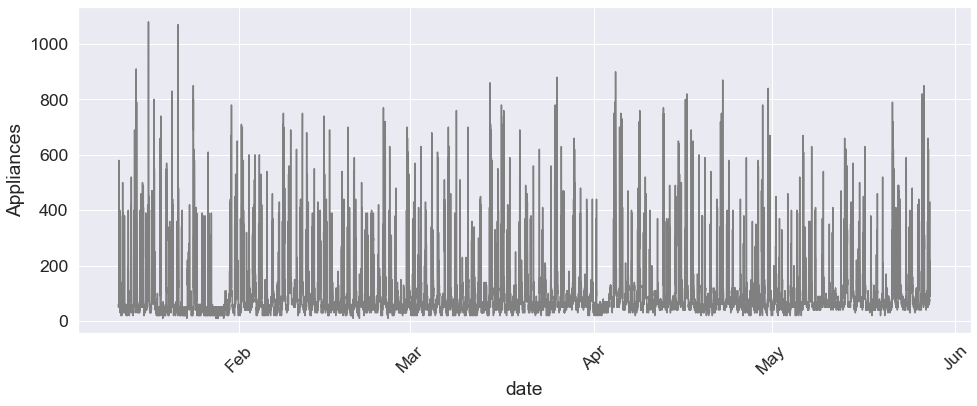

In [4]:
df['date'] = pd.to_datetime(df['date'])
sns.set(rc={'figure.figsize':(16,6)},style='darkgrid', font_scale=1.6)
sns.lineplot(x='date',y='Appliances',data=df,sort=False, color='grey')
plt.xticks(rotation=45)
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

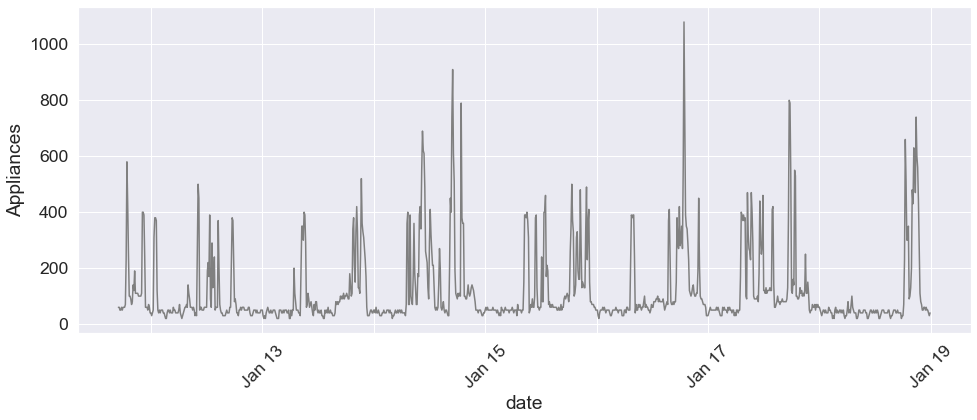

In [5]:
date_before = dt.date(2016,1,19)
week = df[df['date'] < date_before]
sns.lineplot(x='date',y='Appliances',data=week,sort=False, color='grey')
plt.xticks(rotation=45)
# Set the locator
locator = mdates.DayLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b %d')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
for label in X.get_ticklabels()[::2]: ##filters out every 2nd tick label
    label.set_visible(False)
plt.show()
None

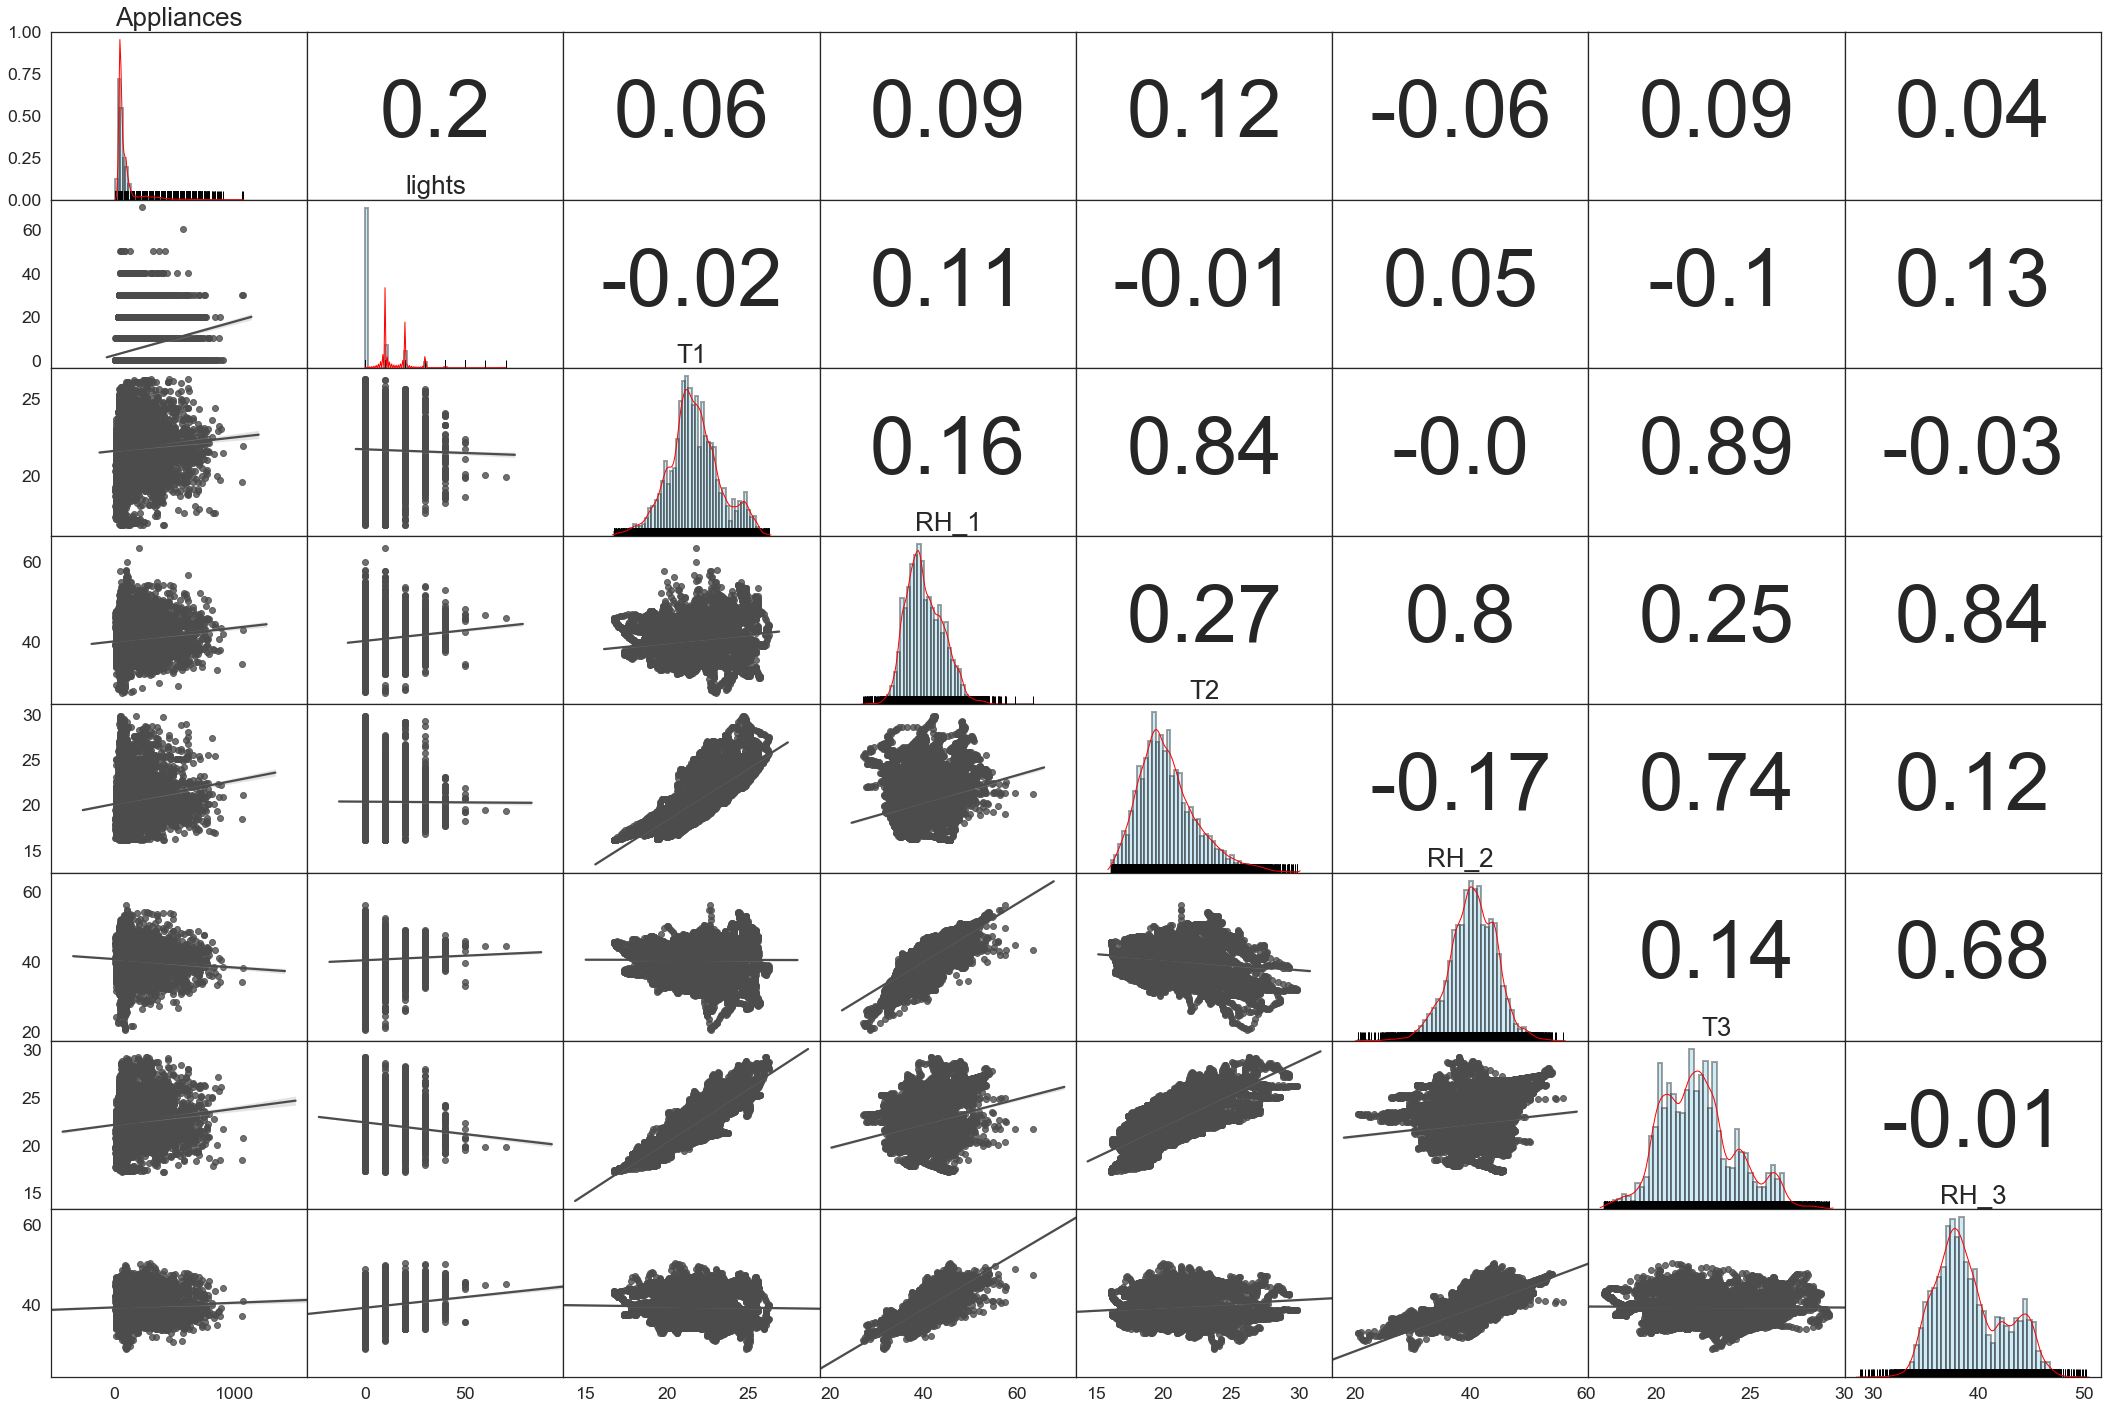

In [6]:
sns.set(rc={'figure.figsize':(12,8.2)},style='white', font_scale=1.6)
var = df[['Appliances', 'lights','T1','RH_1','T2','RH_2','T3','RH_3']]
def corr(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=80)
    

g = sns.PairGrid(var, aspect=1.5, diag_sharey=False, despine=False)
g.map_diag(sns.distplot, color='skyblue',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'skyblue'})
g.map_diag(sns.rugplot, color='black')
g.map_lower(sns.regplot, color='.3')
g.map_upper(corr)
#g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)
#Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), var.columns):
    ax.set_title(col, y=0.82, fontsize=26)
#remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
g

array([   0., 2000., 4000., 6000.])

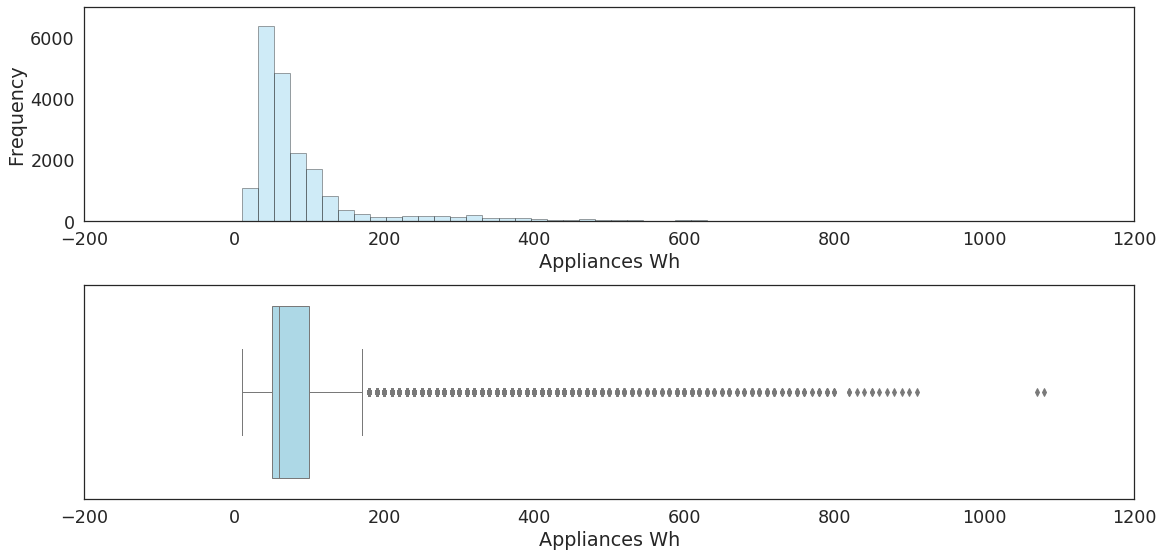

In [7]:
fig,(ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(16,8))
plt.style.use('classic')
ax1 = sns.distplot(df['Appliances'],
             kde=False,rug=False,
             color='skyblue',
             ax=ax1)
sns.boxplot(x=df['Appliances'],
            color='lightblue',
            saturation=1,
            linewidth=1,
            ax=ax2)

fig.tight_layout()
yticks = np.linspace(0,6000,4)
ax1.set_yticks(yticks)
ax1.set(ylabel='Frequency')
ax1.set(xlabel='Appliances Wh')
ax2.set(xlabel='Appliances Wh')
yticks

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['start_time_day_name'] = df['date'].dt.weekday_name
df['start_time_hour'] = df['date'].dt.hour

inc_week = dt.timedelta(days=7)

first_week = dt.date(2016,1,19)
week1 = df[df['date'] < first_week]

second_week = first_week + inc_week
week2 = df[df['date'] > first_week]
week2 = week2[week2['date'] < second_week]

third_week = second_week + inc_week
week3 = df[df['date'] > second_week]
week3 = week3[week3['date']<third_week]

fourth_week = third_week + inc_week
week4 = df[df['date'] > third_week]
week4 = week3[week3['date']<fourth_week]


app_use = pd.pivot_table(week1[['start_time_day_name', 'start_time_hour', 'Appliances']],
                                    index=['start_time_day_name', 'start_time_hour'],
                                    aggfunc='sum')
app_usage_hour1 = app_use.unstack(level=0)
app_usage_hour1 = app_usage_hour1.reindex_axis(labels=['Monday', 'Tuesday',
                                                             'Wednesday', 'Thursday',
                                                             'Friday', 'Saturday', 
                                                             'Sunday'], axis=1, level=1)

app_use1 = pd.pivot_table(week2[['start_time_day_name', 'start_time_hour', 'Appliances']],
                                    index=['start_time_day_name', 'start_time_hour'],
                                    aggfunc='sum')
app_usage_hour2 = app_use1.unstack(level=0)
app_usage_hour2 = app_usage_hour2.reindex_axis(labels=['Monday', 'Tuesday',
                                                        'Wednesday', 'Thursday',
                                                        'Friday', 'Saturday', 
                                                        'Sunday'], axis=1, level=1)

app_use2 = pd.pivot_table(week3[['start_time_day_name', 'start_time_hour', 'Appliances']],
                                    index=['start_time_day_name', 'start_time_hour'],
                                    aggfunc='sum')
app_usage_hour3 = app_use2.unstack(level=0)
app_usage_hour3 = app_usage_hour3.reindex_axis(labels=['Monday', 'Tuesday',
                                                        'Wednesday', 'Thursday',
                                                        'Friday', 'Saturday', 
                                                        'Sunday'], axis=1, level=1)
app_use3 = pd.pivot_table(week4[['start_time_day_name', 'start_time_hour', 'Appliances']],
                                    index=['start_time_day_name', 'start_time_hour'],
                                    aggfunc='sum')
app_usage_hour4 = app_use3.unstack(level=0)
app_usage_hour4 = app_usage_hour4.reindex_axis(labels=['Monday', 'Tuesday',
                                                        'Wednesday', 'Thursday',
                                                        'Friday', 'Saturday', 
                                                        'Sunday'], axis=1, level=1)

In [9]:
hours = []
for hour in range(24):
    hours.append(hour)

days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

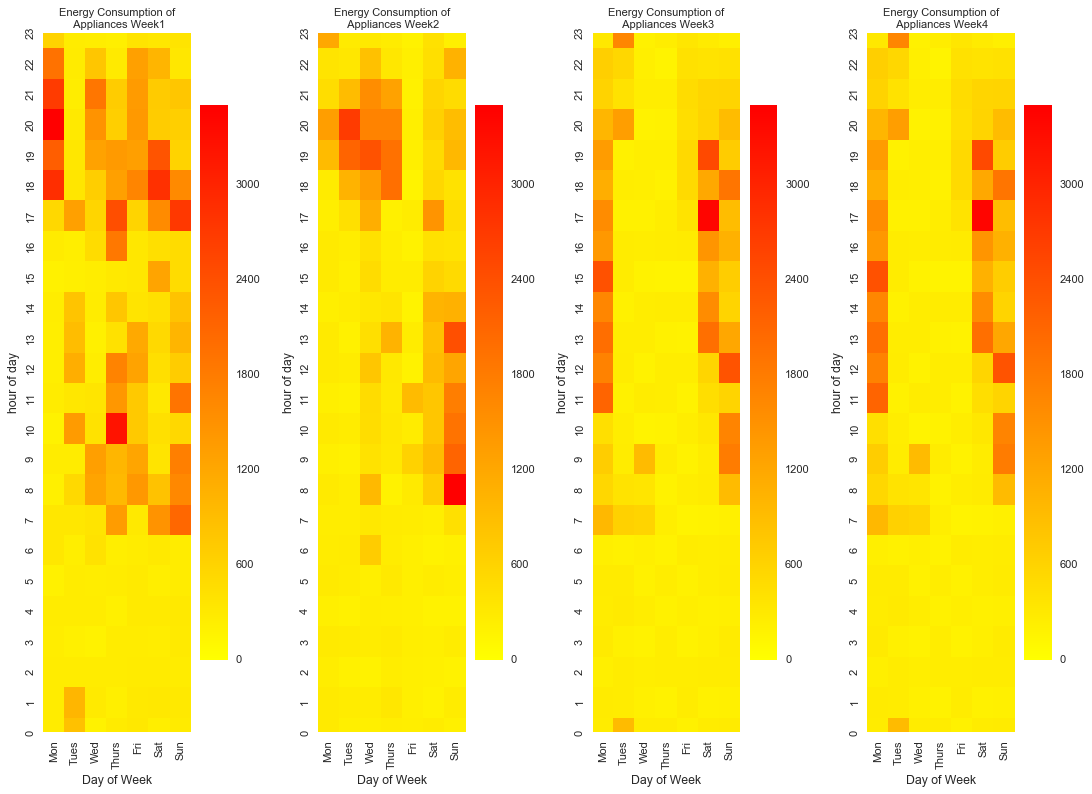

In [10]:
sns.set_context("talk")
plt.style.use('seaborn')
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,nrows=1,figsize=(14,10))
ax1 = sns.heatmap(app_usage_hour1, annot=False, 
                 linewidths=0, ax=ax1,
                 cmap="autumn_r",
                 vmin=0, vmax=3500,
                 cbar=True,
                 xticklabels=days,
                 yticklabels=hours)

ax2 = sns.heatmap(app_usage_hour2, annot=False, 
                 linewidths=0, ax=ax2,
                 cmap="autumn_r",
                 vmin=0, vmax=3500,
                 cbar=True,
                 xticklabels=days,
                 yticklabels=hours)
ax3 = sns.heatmap(app_usage_hour3,annot=False, 
                 linewidths=0, ax=ax3,
                 cmap="autumn_r",
                 vmin=0, vmax=3500,
                 cbar=True,
                 xticklabels=days,
                 yticklabels=hours)

ax4 = sns.heatmap(app_usage_hour3,annot=False, 
                 linewidths=0, ax=ax4,
                 cmap="autumn_r",
                 vmin=0, vmax=3500,
                 cbar=True,
                 xticklabels=days,
                 yticklabels=hours)
fig.tight_layout()

ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

ax1.axes.set_title("Energy Consumption of\n Appliances Week1", fontsize=10, y=1.01)
ax2.axes.set_title("Energy Consumption of\n Appliances Week2", fontsize=10, y=1.01)
ax3.axes.set_title("Energy Consumption of\n Appliances Week3", fontsize=10, y=1.01)
ax4.axes.set_title("Energy Consumption of\n Appliances Week4", fontsize=10, y=1.01)

ax1.set(xlabel='Day of Week', ylabel='hour of day')
ax2.set(xlabel='Day of Week', ylabel='hour of day')
ax3.set(xlabel='Day of Week', ylabel='hour of day')
ax4.set(xlabel='Day of Week', ylabel='hour of day')
None

In [11]:
# train = pd.read_csv(trainingP)
# train.head()

In [31]:
def extract_features(df):
    feature_cols = df.drop('Appliances',axis=1)._get_numeric_data().columns
    X = df[feature_cols]
    return X
def extract_response(df):
    y = df['Appliances']
    return y
def train_linear(X,y):
    model = linear_model.LinearRegression()
    model.fit(X,y)
    return model
    
def crossValScores(model,X,y,cv):
    scores = cross_val_score(model,X,y,cv=cv)
    return scores

def confidenceInt(scores):
    return "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)
    
X = extract_features(df)
y = extract_response(df)
model = train_linear(X,y)
scores = crossValScores(model,X,y,10)
print(confidenceInt(scores))

Accuracy: 0.12 (+/- 0.09)


In [15]:
feature_cols = train.drop('Appliances', axis=1)._get_numeric_data().columns
est = LinearRegression()
X = train[feature_cols]
y = train['Appliances']
selector = RFE(est)
select = selector.fit(X,y)
supp = selector.get_support()
print('Selected features:', feature_cols[supp])
print('Coeffs:', selector.estimator_.coef_)

NameError: name 'train' is not defined

In [16]:
model = linear_model.LinearRegression()
X = train[feature_cols[supp]]
y = train['Appliances']
model.fit(X,y)
for i, item in enumerate(reg.predict(X[:20])):
    print('Actual usage is:', y.iloc[i], 'predicted usage is:', item)

NameError: name 'train' is not defined

In [17]:
predicted = reg.predict(X)
r2 = r2_score(y,predicted)
MSE = metrics.mean_squared_error(y, predicted)
print('MSE:', MSE)
print('R Squared:',r2)

NameError: name 'reg' is not defined

In [18]:
sns.set(rc={'figure.figsize':(12,6)},style='white', font_scale=1.6)
yHat = reg.predict(X)
y = train['Appliances']
residuals = y - yHat
sns.scatterplot(y,residuals, color='grey')
None

NameError: name 'reg' is not defined

In [ ]:
scores = cross_val_score(model, X,y,cv=10)
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=500,test_size=0.3,random_state=6)
scores = cross_val_score(model,X,y,cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
cv = ShuffleSplit(n_splits=50,test_size=0.3,random_state=6)
scores = cross_val_score(model,X,y,cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
for train,test in kf.split(X):
    print("%s %s" % (train,test))

TypeError: Singleton array array(<matplotlib.axis.XAxis object at 0x0000014D742E13C8>, dtype=object) cannot be considered a valid collection.